# 前置作業 (安裝相關套件)

In [0]:
#  執行系統更新
!sudo apt-get update
!sudo apt-get upgrade
!sudo apt autoremove

#  安裝網頁瀏覽套件
!pip install selenium
!apt install chromium-chromedriver

#  於colab安裝中文字體，放置於字體共享區   # !ls /usr/share/fonts/truetype  ##查看
!wget https://github.com/adobe-fonts/source-han-sans/raw/release/OTF/SourceHanSansTC.zip
!unzip SourceHanSansTC.zip
!rm SourceHanSansTC.zip
!mv ./SourceHanSansTC/* /usr/share/fonts/truetype     # !mv /SourceHanSansTC/SourceHanSansTC-Regular.otf /usr/share/fonts/truetype

#  文字雲，停用詞
!wget https://raw.githubusercontent.com/tomlinNTUB/Python/master/%E4%B8%AD%E6%96%87%E5%88%86%E8%A9%9E/%E5%81%9C%E7%94%A8%E8%A9%9E.txt

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [7,064 B]
Get:10 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [834 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [30.9 kB]
Get:13 http://security.ubuntu.com/ubuntu bionic-s

# 載入相關套件

In [0]:
from selenium import webdriver            # 網頁柳覽模擬器
from bs4 import BeautifulSoup             # 網頁程式碼解析工具  

import pandas as pd                       # 數據結構化工具 (欄位)
import numpy as np                        # 數值型態運算處理工具
import time                               # 時間型態處理套件
import re                                 # 正規運算式(regular expression)套件，常用在對文件進行解析

import matplotlib.pyplot as plt           # 繪圖工具
import matplotlib as mpl                     # 繪圖工具文字管理模組
import matplotlib.font_manager as fm         # 繪圖工具文字設定模組
import jieba                              # 中文斷詞套件                                               
from wordcloud import WordCloud, STOPWORDS  # 文字雲繪圖套件

#  自訂網頁解析方法

In [0]:
# 自訂網頁解析方法
def html_parser(url,tag='ul',index=-3):
    options = webdriver.ChromeOptions()                            # 載入網頁瀏覽器 工具選項設定
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    browser = webdriver.Chrome('chromedriver',options=options)
    browser.get(url)                                               # 執行網頁讀取
    
    html_source = browser.page_source                              # 輸出網頁程式碼
    soup = BeautifulSoup(html_source, 'html.parser')
    select = soup.find_all(tag)                                    # 網頁程式碼標籤搜尋 find_all
    results = select[index].find_all("li","item")                  # 設定搜尋標籤
    return select,results                                          # 輸出搜尋結果 (以 list 格式輸出)
    browser.quit()                                                 # 關閉入網頁瀏覽器

In [0]:
# 網頁 類別選單 / 列表爬蟲 
home_url = "https://www.cupoy.com/newsfeed/topstory"               # 設定查詢網址

categories = html_parser(home_url)                                 # 將網址載入自訂方法查詢標籤內容

category_list = []                                                 # 將輸出結果整理 
for category in categories[-1]:                                       # for...in 迴圈整理 類別選單
    href = f'https://www.cupoy.com{category.a["href"]}'               # 類別選單網址
    contex = category.p.text                                          # 類別選單內容
    category = category.a['title']                                    # 類別選單標題 category
    topic = category + '(mix)'                                        # 次標題 topic
    category_list.append([category,topic,contex,href])                # 將整理結果 append到category_list 

    topics = html_parser(href,index=-1)                                  # 將類別選單網址載入
    for topic in topics[-1]:                                                # 查詢標題
        href = f'https://www.cupoy.com{topic.a["href"]}'                       # 標題選單網址
        contex = topic.p.text                                                  # 標題選單內容
        topic = topic.a['title']                                               # 標題 topic
        category_list.append([category,topic,contex,href])            # 將整理結果 append到category_list   

category_df = pd.DataFrame(category_list,columns=['category','topic','synopsis','href'])  # 以pandas套件 輸出dataframe

In [0]:
category_df

,category,topic,synopsis,href
0,享樂女性,享樂女性(mix),享樂女性是一種有質感的生活方式，分享給所有獨立自主的女性關於美妝保養、健康醫療、情感生活等時...,https://www.cupoy.com/collections/topicgrp/Hed...
1,享樂女性,美食,民以食為天，食是人生存的基本需要。\r\n吃，是一件不可避免帶有各自主觀喜好的事，按照喜歡的...,https://www.cupoy.com/newsfeed/topic/PopularDe...
2,享樂女性,旅遊,法國小說家卡繆說過「旅行幫助我們找回自己」。\r\n旅行不只是簡單的看看風景，對於生活在繁忙...,https://www.cupoy.com/newsfeed/topic/TravelLif...
3,享樂女性,美妝保養,愛美是女人的天性，集結受網友歡迎與推薦的美妝文章與最新資訊，包含許多不同化妝技巧和保養步驟，...,https://www.cupoy.com/newsfeed/topic/beautysal...
4,享樂女性,兩性,愛情是人類之間最美好的感情之一，無數男女從陌生人成為戀人，最後又因為各種各樣的原因走向新的道...,https://www.cupoy.com/newsfeed/topic/gender_tw
...,...,...,...,...
114,職場白領,創業,搜羅創業圈最新消息，各行各業商機分析、產業走向、新創團隊等最新消息。,https://www.cupoy.com/newsfeed/topic/startups_tw
115,閱讀,閱讀(mix),我們的生命有限，很多事情都無法親自去體驗。\r\n因此，利用閱讀、透過文字，我們可以超越時間...,https://www.cupoy.com/collections/topicgrp/Rea...
116,閱讀,好文共賞,文學是高度的藝術和思想，觸動心靈的字句能帶給讀者許多的感動，每個人都可以透過文章創作來發布、...,https://www.cupoy.com/newsfeed/topic/GoodArtic...
117,閱讀,童書,以兒童為閱讀對象的文學作品，兒童的行為均以「追尋快樂，減少痛苦」為原則。因此，兒童文學的最基...,https://www.cupoy.com/newsfeed/topic/PictureBo...


# 自訂顯示圖表

In [0]:
# 顯示圖表
def show_dfPlot(df,show=0,size=(20,10),plot_name=''):
    group_df = df.groupby(df.columns[0]).size().reset_index(name='size')              # dataframe 資料整理，以groupby 累計標題數量
    group_df = group_df.sort_values(by=[group_df.columns[1]], ascending=False)        # 將整理後的數量排序 sort_values(by...)
    x = group_df[group_df.columns[0]]                                                   # 顯示標題
    y = group_df[group_df.columns[1]]                                                   # 累計數量

    font_path  = '/usr/share/fonts/truetype/SourceHanSansTC-Regular.otf'               # 設定字體參照來源位址
    font = fm.FontProperties(fname=font_path , size= 15)                               # 整字體設定
    plt.rcParams['axes.unicode_minus'] = False                                         # 將負號 (-) 顯示

    # 圖表設定
    fig = plt.figure(figsize=size)                                                     # 設定圖表尺寸                        
    if show == 0:                                                                         # pie-chart 設定
        patches,l_text,p_text = plt.pie(y, labels=x, autopct = '%1.1f%%')
        for t in l_text:
            t.set_fontproperties(font)  
        for t in p_text:
            t.set_size(13)
        plt.axis('equal')

    if show == 1:                                                                         # barh-chart 設定 
        plt.barh(x,y)  
        plt.yticks(x,fontproperties=font)

    plt.show()                                                                         # 圖表顯示 
    fig.savefig(f'{plot_name}.png')                                                    # 圖表存檔

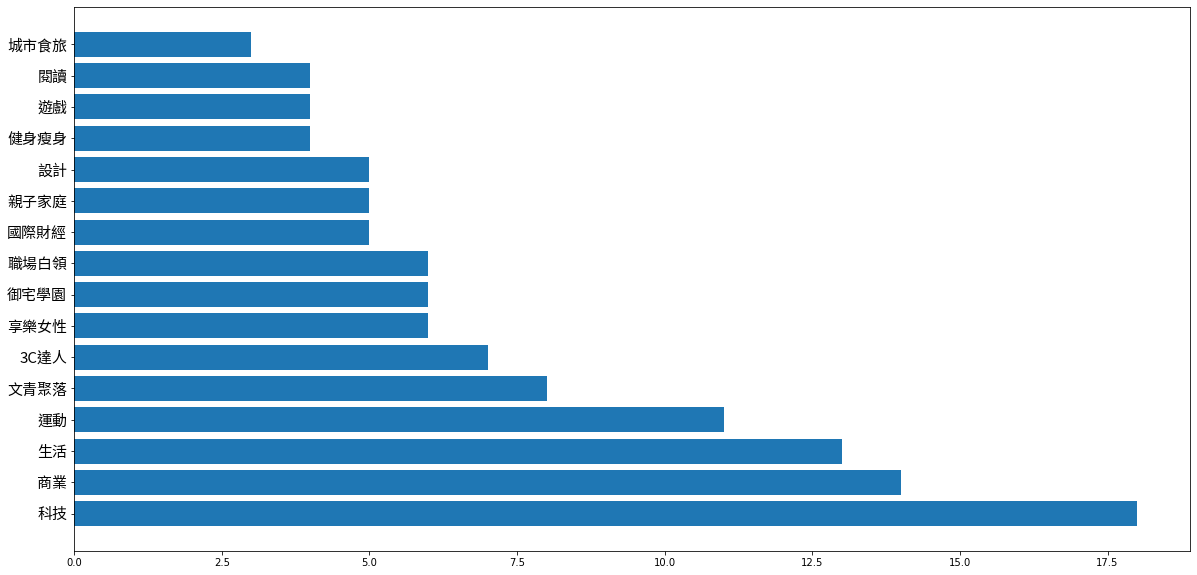

In [0]:
show_dfPlot(category_df,1,plot_name='category_df')

In [0]:
# 選定分類，查詢文章內容   
def category_number(number=0):
    if number >118:                                                # df_category.count : category 0 ~ 118
        print('超過項目範圍，選取範圍: 0 ~ 118')
        number=118
    topic = category_df.loc[number]['topic']                       # 設定查詢標題 (number)
    category_url = category_df.loc[number]['href']                 # 顯示標題位址
    synopsis = category_df.loc[number]['synopsis']                 # 顯示標題描敘
    category = category_df.loc[number]['category']                 # 顯示類別
    print(f'category_number:{number}  category:{category}')
    print(f'contex:{contex}')
    print(f'category_url:{category_url}')
    return category_url                                             # 輸出標題位址

In [0]:
category_number(30)

category_number:30  category:科技
contex:小說是文學的一種樣式，一般描寫人物故事，塑造多種多樣的人物形象，它是擁有完整布局、發展及主題的文學作品。
category_url:https://www.cupoy.com/newsfeed/topic/cloud_services_tw


'https://www.cupoy.com/newsfeed/topic/cloud_services_tw'

In [0]:
# 自訂文章解析方法
def artical_parser(url,counts=0,tag='ul',index=-3):
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    browser = webdriver.Chrome('chromedriver',options=options)

    if type(url) == int:
       url = category_number(url)
    browser.get(url)

    # 設定搜尋文章數量
    count = 1
    title_list = []
    category_list = []
    while (count <= counts) :
        html_source = browser.page_source
        soup = BeautifulSoup(html_source, 'html.parser')

        for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
            # print(artical)
            source = artical.find('div', class_ ="sc-gacfCG bPSpUf").text
            date = artical.span.text
            topic = artical.a['title']            
            contex = artical.p.text            
            href = artical.a["href"]

            if topic not in category_list:
                count += 1
                category_list.append([source, date, topic, contex, href])
                time.sleep(0.7)
                browser.execute_script("window.scrollTo(0, 1000000);")

            if count == counts+1:
                df_category = pd.DataFrame(category_list,columns=['source','date','topic','contex','href'])
                return df_category
                browser.quit()
                break  

In [0]:
# url = "https://www.cupoy.com/newsfeed/topstory"
articles_df = artical_parser(30,500)
articles_df

category_number:30  category:科技
contex:小說是文學的一種樣式，一般描寫人物故事，塑造多種多樣的人物形象，它是擁有完整布局、發展及主題的文學作品。
category_url:https://www.cupoy.com/newsfeed/topic/cloud_services_tw


,source,date,topic,contex,href
0,Soft & Share 軟體開發資訊分享,29 分鐘前,Google Could 的雲端架構專業認證 - Soft & Share 線上課程資訊分享,在雲端架構將你的職業發展進一步 Google 雲的雲端架構專業認證被 Global Know...,https://softnshare.com/gcp-cloud-architect/
1,T客邦,3 小時前,NCC通過「三立威視臺頻道」主打網路影音電視化呈現，並否決另3臺頻道申請案 | T客邦,NCC今日召開委員會議決議，表示審核4個新申請的頻道，僅有一個新頻道案通過。通過的為境內頻道...,https://www.techbang.com/posts/76313-ncc-prese...
2,TechOrange 科技報橘,5 小時前,聯準會：使用 Google 大神，平均每人讓 GDP 減少 53 萬臺幣 | TechOrange,如果今天給你 17530 美元（約臺幣 53 萬），你願意一年不用 Google 嗎？ 美國...,https://buzzorange.com/techorange/2020/02/19/g...
3,凱絡媒體週報,5 小時前,【凱絡數位廣告開箱】第二集｜Facebook Canvas即時體驗廣告 – 凱絡媒體週報 ‧...,Pancy Chiang 你可能在手機上的Facebook App看過這樣的廣告：他就像一般...,https://twncarat.wordpress.com/2020/02/19/%e3%...
4,A Day Magazine,6 小時前,昨晚，河正宇吸毒被捕的消息，讓媒體都「集體高潮」了 ‧ A Day Magazine,昨晚，河正宇吸毒被捕的消息讓亞洲媒體都集體高潮了！G 點就是堂堂韓國影帝兼票房保證「江林公子...,http://www.adaymag.com/2020/02/19/ha-jung-woo-...
...,...,...,...,...,...
495,動腦雜誌,2019年5月9日,IKEA霜淇淋買氣大於傢俱？知名傢具品牌的社群表現孰優孰劣！ - 動腦Brain.com.t...,別說你沒吃過它ㄛ！每次去IKEA都要buy的😍😍😍這次FansTogather粉絲團聯盟精選...,https://www.brain.com.tw/news/articlecontent?I...
496,免費資源網路社群,2019年5月10日,Supr.Link 超級縮網址，可分流、判斷裝置導入不同目標頁面,Supr.Link 是我最近無意間發現的免費縮網址工具，來自臺灣 Aotter 電獺公司，除...,https://free.com.tw/supr-link/?utm_content=buf...
497,流動日報,2019年5月9日,看好臺灣市場 LINE 宣佈加碼對臺投資 30 億臺幣 - New MobileLife 流動日報,「臺灣人最愛使用的 LINE，是怎麼開始發展的 ?」最有資格回答這個問題的，無疑是LINE通...,https://www.newmobilelife.com/2019/05/10/line-...
498,籃球影片分享,2019年5月9日,【影片】今日五佳球：K湯致命一擊殺死比賽，字母哥一攻一防獨佔兩席！ - Haters-黑特籃...,5月8日，今天共進行了2場激烈的系列賽，一起來觀看新鮮出爐的五佳球！Iguodala擺脫哈登...,http://www.ballgametime.com/news/138449.html


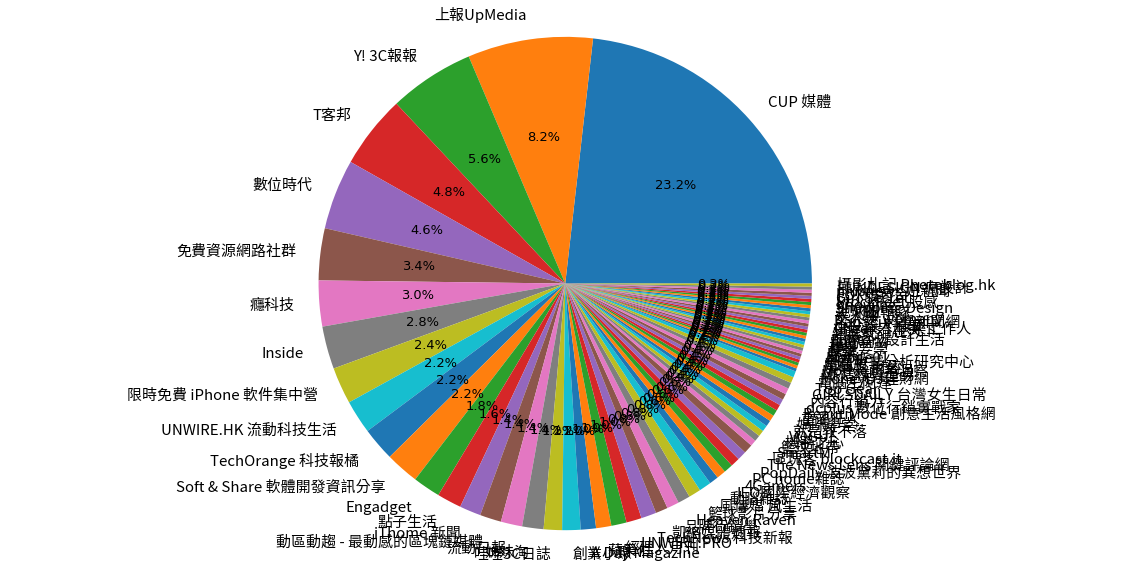

In [0]:
show_dfPlot(articles_df,plot_name='articles_df')

In [0]:
articles_df.to_csv(r'articles500.txt', encoding='utf8', sep=' ', mode='w')

# 文字蒐集 

In [0]:
import jieba                                                                              # 載入相關套件
from wordcloud import WordCloud, STOPWORDS

# 自訂文字擷取方法
def jieba_str(seg_str):     
    stopWords=[]
    segments=[]
    remainderWords=[]
      
    segments = jieba.lcut(seg_str, cut_all=False)                                         # 中文斷詞
    select = pd.Series(segments)  
    k = select.value_counts(normalize=False)
    print(f'斷詞前{k}\n')

    print('//**分隔線**//'*3,'\n')
 
    with open('停用詞.txt', 'r', encoding='UTF-8') as file:                                # 讀取停用詞
        for data in file.readlines():
            stopWords.append(data.strip())

    remainderWords = list(filter(lambda a: a not in stopWords and a != '\n', segments))    # 去除停用詞

    remain = pd.Series(remainderWords)  
    j = remain.value_counts(normalize=False)
    print(f'斷詞後{j}')

    new_str = ' '.join(remainderWords)                                                     # 將斷詞後的 list 文字型態轉為 str
    return  new_str                                                                        # 輸出新字串

#  文字雲

斷詞前       4887
=      3016
/      2836
，      2344
的      1701
       ... 
及來        1
實事        1
基美隆       1
加贈        1
失聰        1
Length: 8819, dtype: int64

//**分隔線**////**分隔線**////**分隔線**// 

斷詞後             4887
Instagram     163
WhatsApp      134
YouTube       130
instagram     121
             ... 
幸福              1
訂購              1
雲彩              1
荒蕪              1
失聰              1
Length: 8417, dtype: int64


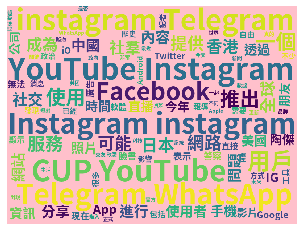

In [0]:
# with open(r'tx.txt') as f:                                                              # 執行文字擷取
#     seg_str = f.read()

seg_str = ' '.join(articles_df['contex'].tolist())                                        # 將文章內容 dataframe 轉成list 再添加至 str 

seg_ji = jieba_str(seg_str)                                                               # 將文章內容 str 輸入至自訂方法

fig,ax=plt.subplots()                                                                     # 設定文字雲圖
font_path = '/usr/share/fonts/truetype/SourceHanSansTC-Bold.otf'                             # 設定字型來源
mycloudword=WordCloud(width=800,                                                             # 設定文字雲 寬度
                      height=600,                                                            # 設定文字雲 寬度
                      background_color='pink',                                               # 設定背景顏色
                      max_words=100,                                                         #  設定最大分詞數量
                      font_path=font_path,                                                   #  若為中文則需引入中文字型
                      min_font_size=10,                                                      #  顯示字體的最小值 
                      max_font_size=300,                                                     #  顯示字體的最大值 
                      stopwords=STOPWORDS,                                                   #  設定停用詞，不顯示於文字雲
                      random_state=50).generate(seg_ji)                                   # 執行文字雲製作

ax.imshow(mycloudword)
ax.axis("off")
plt.show()
# wc.to_file("wordcloud.jpg")                                                             # 文字雲圖檔儲存